In [ ]:
########## LIBRERÍAS A UTILIZAR ##########
#Se importan la librerias a utilizar
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#Importamos los datos de la misma librería de scikit-learn
dataset = datasets.load_breast_cancer()
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
########## ENTENDIMIENTO DE LA DATA ##########
#información contenida en el dataset
print('Información en el dataset:')
print(dataset.keys())
print()

Información en el dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])



In [ ]:
dataset.data.shape

(569, 30)

In [ ]:
#características del dataset
print('Características del dataset:')
print(dataset.DESCR)


Características del dataset:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instan

In [ ]:
#Seleccionamos todas las columnas
X = dataset.data


In [ ]:
#Defino los datos correspondientes a las etiquetas
y = dataset.target

In [ ]:
########## IMPLEMENTACIÓN DE MAQUINAS VECTORES DE SOPORTE ##########
from sklearn.model_selection import train_test_split

In [ ]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
#Defino el algoritmo a utilizar
from sklearn import svm


In [ ]:
#Crear un clasificador svm
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#Entrena al modelo usando los conjuntos de entrenamiento
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)


In [ ]:
#Importe el módulo de métricas scikit-learn para calcular la precisión
from sklearn.metrics import classification_report, confusion_matrix

# Precisión del modelo: ¿con qué frecuencia es correcto el clasificador?
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

Exactitud: 0.9649122807017544


In [ ]:
# Precisión del modelo: ¿qué porcentaje de tuplas positivas se etiquetan como tales?

print("Presicion:",metrics.precision_score(y_test, y_pred))



Presicion: 0.972972972972973


In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

In [ ]:
matriz = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[72  2]
 [ 2 38]]


In [ ]:
cm= np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confucion= pd.DataFrame(cm, index=['es cancer', 'esta saludable'],
                       columns=['prediccion cancer', 'prediccion saludable'])
confucion

,prediccion cancer,prediccion saludable
es cancer,72,2
esta saludable,2,38


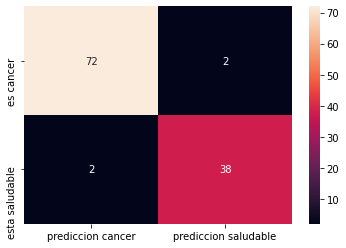

In [ ]:
sns.heatmap(confucion, annot=True)